# DSCI 632 Final

Your final is to use the dataset of your choice and the techniques in this class to do the following:

1. Define and describe the dataset (10 points)
1. Clean the data (10 points)
1. Transform the clean data (10 points)
1. Show your analysis of the data (10 points)

## Ground Rules

1. Explain everything you're doing with pyspark in the code cells using [markdown](https://www.markdownguide.org/cheat-sheet) in text cells. Help the reader understand why you're doing each step so they can re-create it. Remember, this is an assignment to show how you analyze data to a potential employer. Don't use code comments to explain things.
1. All of the sections are heading 1 in markdown, so use heading 2 to write your explainations, and heading 3 for any sub-headers. Check in your table of contents view in colab to make sure each point is listed before you turn this in.
1. Don't hesisate to use multiple code/text cells in each section, as long as they're all labeled and described.
1. Assume that the reader doesn't have access to the dataset on your local machine. Provide a link to the dataset you're using, or if able, include code to copy it from a public source. Don't rely on uploading from your local machine. (Importing from Google Drive is ok, as long as you provide the link to the data)
1. If using GCP services, include screenshots from your console if there's a step that you aren't able to re-produce in code. Using the SDK is always preferred, but you won't lose points for using screenshots and explaining them.
1. Import the data ONCE, then transform it to fit your analysis.
1. Don't overwrite data, make new columns for new transformations. You can always drop columns later, but you can't get overwritten values back.
1. Feel free to work with classmates, but all work submitted must be your own.
1. Make sure to run disconnect the runtime and re-run the notebook at least once before turning in. If you are getting certain Java runtime errors, this might also help.



## Extra Credit Opportunities!

- If you provide a link to this notebook on your public GitHub page instead of turning it in as an attachment, you will get 2 points extra credit.
- Extra credit will be given for using the [Google Cloud SDK](https://cloud.google.com/sdk/) to create/use/destroy any cloud resources, up to 2 points per section, 8 points total.
 - Don't be afraid to look at the GCP example colab notebooks from the class notes, the GCP documentation, or GitHub for examples.
- If this notebook is self-contained, you will get 5 points extra credit. (Requirements below)
 - The data is imported without relying on Google Drive, as the paths to data in Google Drive are user-specific. Downloads from public storage buckets/services are fine. (1 point)
 - It be run from start to finish without making any changes to paths, code, or variable names. (1 point)
 - All calls to external services, including GCP, are done programatically, no screenshots explaining how it worked in a browser console. (Using an API or SDK, 2 points)
 - All cloud resources are destroyed at the end of the notebook in a seperate section (Also via API or SDK, 1 point)

---

# Section 1: Define and describe the dataset

10 points

Import the dataset, and describe why you'll be analyzing in it. You can summarize a few columns, show a more information on the relavent features, or but help the reader understand what the dataset is, what is in it, and why you picked it.

Some questions that it might help you to answer:
1. Why are you choosing this dataset?
1. What variables will you use?
1. What analysis(es) will you run?
1. Do you have any hypotheses? What are they?

### This section should include one or more of the following:
- A histogram of several features relavent to your analysis
- The schema of the dataset, with the datatypes assigned correctly
- A text cell with explainations of the relavent features in [markdown](https://www.markdownguide.org/cheat-sheet)
- Use Spark SQL or built-in methods to show a range of values
- Most common words/n-grams found

## Set up for Pyspark

In [2]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=bf2381e8129b618f9ffa76298020ce47f263d9f6dac9258318b97ca8e0e55bb0
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [3]:
# Spark SQL
!pip install pyspark[sql]
# pandas API on Spark
!pip install pyspark[pandas_on_spark] plotly  # to plot your data, you can install plotly together.
# Spark Connect
!pip install pyspark[connect]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: grpcio-status
    Found existing installation: grpcio-status 1.48.2
    Uninstalling grpcio-status-1.48.2:
      Successfully uninstalled grpcio-status-1.48.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 4.25.3 which is incompatible.


In [4]:
# Install findspark
!pip install findspark

In [5]:
import findspark
findspark.init()

In [6]:
from pyspark.sql import SparkSession

In [7]:
APP_NAME = "DSCI_632_Final_Project"
CONFIGURATION = {
    "spark.cores.max":10,
    "spark.executor.cores":5,
    "spark.executor.memory":"8g",
    "spark.driver.memory": "12g"
}

In [8]:
spark = SparkSession.builder.config(map=CONFIGURATION).appName(APP_NAME).getOrCreate()

In [9]:
spark

In [10]:
spark.sparkContext.getConf().getAll()

[('spark.driver.extraJavaOptions',
  '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/jdk.internal.ref=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED -Djdk.reflect.useDirectMethodHandle=false'),
 ('spark.driver.memory', '12g'),
 ('spark.executor.cores', '5'),
 ('spark.executor.id', 'driver'),
 ('s

In [11]:
import os
os.cpu_count()

8

In [12]:
# Additional System Info
# !nvidia-smi

In [13]:
# Additional System Info
# !cat /proc/cpuinfo

## Import the dataset directly from UC Irvine Machine Learning Repository via the API package. Dataset is imported automatically as a pandas dataframe.

Dataset Citation:  
S.,B. and Nagapadma,Rohini. (2024). RT-IoT2022 . UCI Machine Learning Repository. https://doi.org/10.24432/C5P338.

In [14]:
!pip install ucimlrepo

In [15]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
rt_iot2022 = fetch_ucirepo(id=942)

# data (as pandas dataframes)
X = rt_iot2022.data.features
y = rt_iot2022.data.targets

# metadata
print(rt_iot2022.metadata)

{'uci_id': 942, 'name': 'RT-IoT2022 ', 'repository_url': 'https://archive.ics.uci.edu/dataset/942/rt-iot2022', 'data_url': 'https://archive.ics.uci.edu/static/public/942/data.csv', 'abstract': 'The RT-IoT2022, a proprietary dataset derived from a real-time IoT infrastructure, is introduced as a comprehensive resource integrating a diverse range of IoT devices and sophisticated network attack methodologies. This dataset encompasses both normal and adversarial network behaviours, providing a general representation of real-world scenarios.\nIncorporating data from IoT devices such as ThingSpeak-LED, Wipro-Bulb, and MQTT-Temp, as well as simulated attack scenarios involving Brute-Force SSH attacks, DDoS attacks using Hping and Slowloris, and Nmap patterns, RT-IoT2022 offers a detailed perspective on the complex nature of network traffic. The bidirectional attributes of network traffic are meticulously captured using the Zeek network monitoring tool and the Flowmeter plugin. Researchers can

In [16]:
# variable information
rt_iot2022.variables

,name,role,type,demographic,description,units,missing_values
0,id.orig_p,Feature,Integer,None,None,None,no
1,id.resp_p,Feature,Integer,None,None,None,no
2,proto,Feature,Categorical,None,None,None,no
3,service,Feature,Continuous,None,None,None,no
4,flow_duration,Feature,Continuous,None,None,None,no
...,...,...,...,...,...,...,...
80,fwd_init_window_size,Feature,Integer,None,None,None,no
81,bwd_init_window_size,Feature,Integer,None,None,None,no
82,fwd_last_window_size,Feature,Integer,None,None,None,no
83,Attack_type,Target,Categorical,None,None,None,no


In [17]:
#Check for missing values
rt_iot2022.variables[rt_iot2022.variables['missing_values'] == 'yes']

,name,role,type,demographic,description,units,missing_values


In [18]:
#look at all features
X.columns

Index(['id.orig_p', 'id.resp_p', 'proto', 'service', 'flow_duration',
       'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.tot',
       '

In [19]:
#Make lists for features - Will Be Used in Later Sections
cat_features = [r['name'] for i, r in rt_iot2022.variables.iterrows() if r['role'] == 'Feature' and r['type'] == 'Categorical']
cat_features.append('service')
num_features = [r['name'] for i, r in rt_iot2022.variables.iterrows() if r['role'] == 'Feature' and r['type'] != 'Categorical']
num_features.remove('service')
int_num_features = [r['name'] for i, r in rt_iot2022.variables.iterrows() if r['role'] == 'Feature' and r['type'] == 'Integer']
cont_num_features = [r['name'] for i, r in rt_iot2022.variables.iterrows() if r['role'] == 'Feature' and r['type'] == 'Continuous']
cont_num_features.remove('service')

## Convert pandas dataframe into Pyspark dataframe

In [20]:
import pandas as pd

# combine pandas dataframes
pandas_df = pd.concat([X, y], axis=1)

# Convert to Spark DataFrame
spark_df = spark.createDataFrame(pandas_df)

spark_df.show()

+---------+---------+-----+-------+------------------+------------+------------+-----------------+-----------------+------------------+------------------+------------------+-------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+-------------------+------------------+------------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------+---------------------+---------------------+---------------------+---------------------+-----------------+--------------------+--------------------+-----------+-------------+-----------------+-----------+------------------+------------------+-----------------+-----

## Here's a brief explanation of these standardized network traffic features:

* id.orig_p: Source port of the network traffic.
* id.resp_p: Destination port of the network traffic.
* proto: Protocol used for the communication (e.g., TCP, UDP).
* service: The service or application associated with the traffic.
* flow_duration: Duration of the flow, i.e., the time interval between the first and last packet of the flow.
* fwd_pkts_tot: Total number of packets transmitted in the forward direction.
* bwd_pkts_tot: Total number of packets transmitted in the backward direction.
* fwd_data_pkts_tot: Total number of data packets transmitted in the forward direction.
* bwd_data_pkts_tot: Total number of data packets transmitted in the backward direction.
* fwd_pkts_per_sec: Average number of forward packets per second.
* bwd_pkts_per_sec: Average number of backward packets per second.
* flow_pkts_per_sec: Average number of packets per second in the flow.
* down_up_ratio: Downstream-to-upstream packet ratio.
* fwd_header_size_tot: Total size of headers in the forward direction.
* fwd_header_size_min: Minimum header size in the forward direction.
* fwd_header_size_max: Maximum header size in the forward direction.
* fwd_header_size_tot: Total size of headers in the backward direction.
* bwd_header_size_min: Minimum header size in the backward direction.
* bwd_header_size_max: Maximum header size in the backward direction.
* flow_FIN_flag_count: This feature counts the number of packets in the flow that have the FIN (Finish) flag set. The FIN flag is used to indicate that the sender has finished sending data.
* flow_SYN_flag_count: SYN (Synchronize) is a TCP flag used to initiate a connection between two hosts. This count represents the number of packets in the flow that have the SYN flag set.
* flow_RST_flag_count: RST (Reset) flag is used to reset a connection. It can be sent by either the sender or receiver to abruptly terminate the connection. This count indicates how many packets in the flow have the RST flag set.
* fwd_PSH_flag_count: PSH (Push) flag instructs the receiving TCP stack to pass the data to the application layer immediately without buffering. This count represents the number of packets in the forward direction with the PSH flag set.
* bwd_PSH_flag_count: Similar to the forward PSH flag count, this feature counts the number of packets in the backward direction with the PSH flag set.
* flow_ACK_flag_count: ACK (Acknowledgment) flag is used to acknowledge receipt of data. This count indicates how many packets in the flow have the ACK flag set.
* fwd_URG_flag_count: URG (Urgent) flag is used to indicate that the data contained in the packet requires urgent delivery. This count represents the number of packets in the forward direction with the URG flag set.
* bwd_URG_flag_count: Similar to the forward URG flag count, this feature counts the number of packets in the backward direction with the URG flag set.
* flow_CWR_flag_count: CWR (Congestion Window Reduced) flag is used to indicate that the sending host has reduced its congestion window size. This count indicates how many packets in the flow have the CWR flag set.
* flow_ECE_flag_count: ECE (Explicit Congestion Notification Echo) flag is used to signal that the TCP sender received a packet with the ECN (Explicit Congestion Notification) flag set, indicating congestion in the network. This count represents how many packets in the flow have the ECE flag set.
* fwd_pkts_payload.min: Minimum payload size of forward packets.
* fwd_pkts_payload.max: Maximum payload size of forward packets.
* fwd_pkts_payload.tot: Total payload size of forward packets.
* fwd_pkts_payload.avg: Average payload size of forward packets.
* fwd_pkts_payload.std: Standard deviation of payload size of forward packets.
* bwd_pkts_payload.min: Minimum payload size of backward packets.
* bwd_pkts_payload.max: Maximum payload size of backward packets.
* bwd_pkts_payload.tot: Total payload size of backward packets.
* bwd_pkts_payload.avg: Average payload size of backward packets.
* bwd_pkts_payload.std: Standard deviation of payload size of backward packets.
* flow_pkts_payload.min: Minimum payload size of packets in the flow.
* flow_pkts_payload.max: Maximum payload size of packets in the flow.
* flow_pkts_payload.tot: Total payload size of packets in the flow.
* flow_pkts_payload.avg: Average payload size of packets in the flow.
* flow_pkts_payload.std: Standard deviation of payload size of packets in the flow.
* fwd_iat.min: Minimum inter-arrival time of forward packets.
* fwd_iat.max: Maximum inter-arrival time of forward packets.
* fwd_iat.tot: Total inter-arrival time of forward packets.
* fwd_iat.avg: Average inter-arrival time of forward packets.
* fwd_iat.std: Standard deviation of inter-arrival time of forward packets.
* bwd_iat.min: Minimum inter-arrival time of backward packets.
* bwd_iat.max: Maximum inter-arrival time of backward packets.
* bwd_iat.tot: Total inter-arrival time of backward packets.
* bwd_iat.avg: Average inter-arrival time of backward packets.
* bwd_iat.std: Standard deviation of inter-arrival time of backward packets.
* flow_iat.min: Minimum inter-arrival time of packets in the flow.
* flow_iat.max: Maximum inter-arrival time of packets in the flow.
* flow_iat.tot: Total inter-arrival time of packets in the flow.
* flow_iat.avg: Average inter-arrival time of packets in the flow.
* low_iat.std: Standard deviation of inter-arrival time of packets in the flow.
* payload_bytes_per_second: Rate of payload bytes transmitted per second.
* fwd_subflow_pkts: Number of packets in the forward subflow.
* bwd_subflow_pkts: Number of packets in the backward subflow.
* fwd_subflow_bytes: Number of bytes in the forward subflow.
* bwd_subflow_bytes: Number of bytes in the backward subflow.
* fwd_bulk_bytes: Number of bulk bytes in the forward direction.
* bwd_bulk_bytes: Number of bulk bytes in the backward direction.
* fwd_bulk_packets: Number of bulk packets in the forward direction.
* bwd_bulk_packets: Number of bulk packets in the backward direction.
* fwd_bulk_rate: Bulk rate in the forward direction.
* bwd_bulk_rate: Bulk rate in the backward direction.
* active.min: Minimum time the flow was active.
* active.max: Maximum time the flow was active.
* active.tot: Total time the flow was active.
* active.avg: Average time the flow was active.
* active.std: Standard deviation of the time the flow was active.
* idle.min: Minimum time the flow was idle.
* idle.max: Maximum time the flow was idle.
* idle.tot: Total time the flow was idle.
* idle.avg: Average time the flow was idle.
* idle.std: Standard deviation of the time the flow was idle.
* fwd_init_window_size: Initial window size in the forward direction.
* bwd_init_window_size: Initial window size in the backward direction.
* fwd_last_window_size: Last window size in the forward direction.

Note: flag counts provide insights into the behavior of TCP connections, such as connection establishment, termination, and handling of congestion. Analyzing these flags can help in understanding network behavior, detecting anomalies, and identifying potential security threats like DoS (Denial of Service) attacks or port scans.

## Exploratory Data Analysis

In [21]:
# Counts for label - Showing that Multi Class label is imbalanced
y.value_counts()

Attack_type               
DOS_SYN_Hping                 94659
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
dtype: int64

In [22]:
# Number of classes in label
y.value_counts().size

12

In [23]:
 # Counts for protocol feature
X['proto'].value_counts()

tcp     110427
udp      12633
icmp        57
Name: proto, dtype: int64

In [24]:
 #Counts for service feature
X['service'].value_counts()

-         102861
dns         9753
mqtt        4132
http        3464
ssl         2663
ntp          121
dhcp          50
irc           43
ssh           28
radius         2
Name: service, dtype: int64

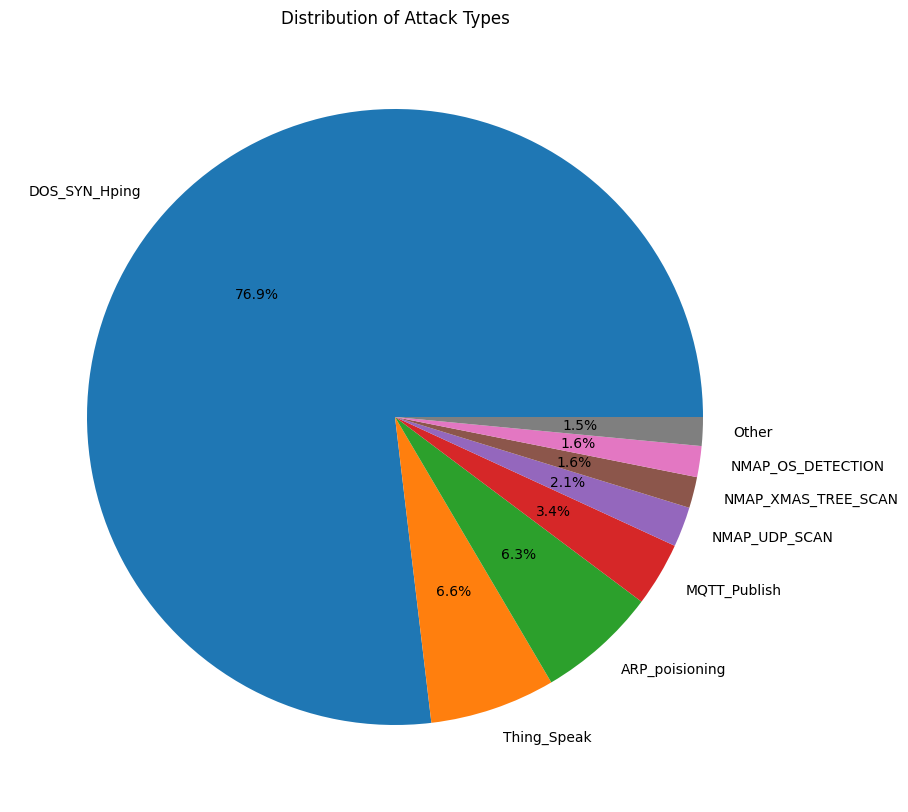

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each label, combine low counts into one 'Other' group
counts = y.value_counts().to_list()
counts_labels = [i[0] for i in list(y.value_counts().index)]
counts_sum = sum(counts)
other_count = 0
counts_index_to_remove = list()

for index in range(len(counts_labels)):
  if (counts[index] * 100 / counts_sum) < 1:
    other_count += counts[index]
    counts_index_to_remove.append(index)

for index, index_to_remove in enumerate(counts_index_to_remove):
    counts.pop(index_to_remove - index)
    counts_labels.pop(index_to_remove - index)

counts.append(other_count)
counts_labels.append('Other')

# Plot pie chart
plt.figure(figsize=(10, 10))
plt.pie(counts, labels=counts_labels, autopct='%1.1f%%')
plt.title('Distribution of Attack Types')
plt.show()

In [26]:
#Check if there are some int features that do not change
for f in num_features:
  number_of_unique_values = X[f].value_counts().size
  if number_of_unique_values == 1:
    print("Feature", f, "does not change.")

Feature bwd_URG_flag_count does not change.


array([[<Axes: title={'center': 'id.orig_p'}>,
        <Axes: title={'center': 'id.resp_p'}>,
        <Axes: title={'center': 'flow_duration'}>],
       [<Axes: title={'center': 'fwd_pkts_tot'}>,
        <Axes: title={'center': 'bwd_pkts_tot'}>,
        <Axes: title={'center': 'fwd_data_pkts_tot'}>],
       [<Axes: title={'center': 'bwd_data_pkts_tot'}>,
        <Axes: title={'center': 'fwd_pkts_per_sec'}>,
        <Axes: title={'center': 'bwd_pkts_per_sec'}>],
       [<Axes: title={'center': 'flow_pkts_per_sec'}>,
        <Axes: title={'center': 'down_up_ratio'}>,
        <Axes: title={'center': 'fwd_header_size_tot'}>],
       [<Axes: title={'center': 'fwd_header_size_min'}>,
        <Axes: title={'center': 'fwd_header_size_max'}>,
        <Axes: title={'center': 'bwd_header_size_tot'}>],
       [<Axes: title={'center': 'bwd_header_size_min'}>,
        <Axes: title={'center': 'bwd_header_size_max'}>,
        <Axes: title={'center': 'flow_FIN_flag_count'}>],
       [<Axes: title={'cen

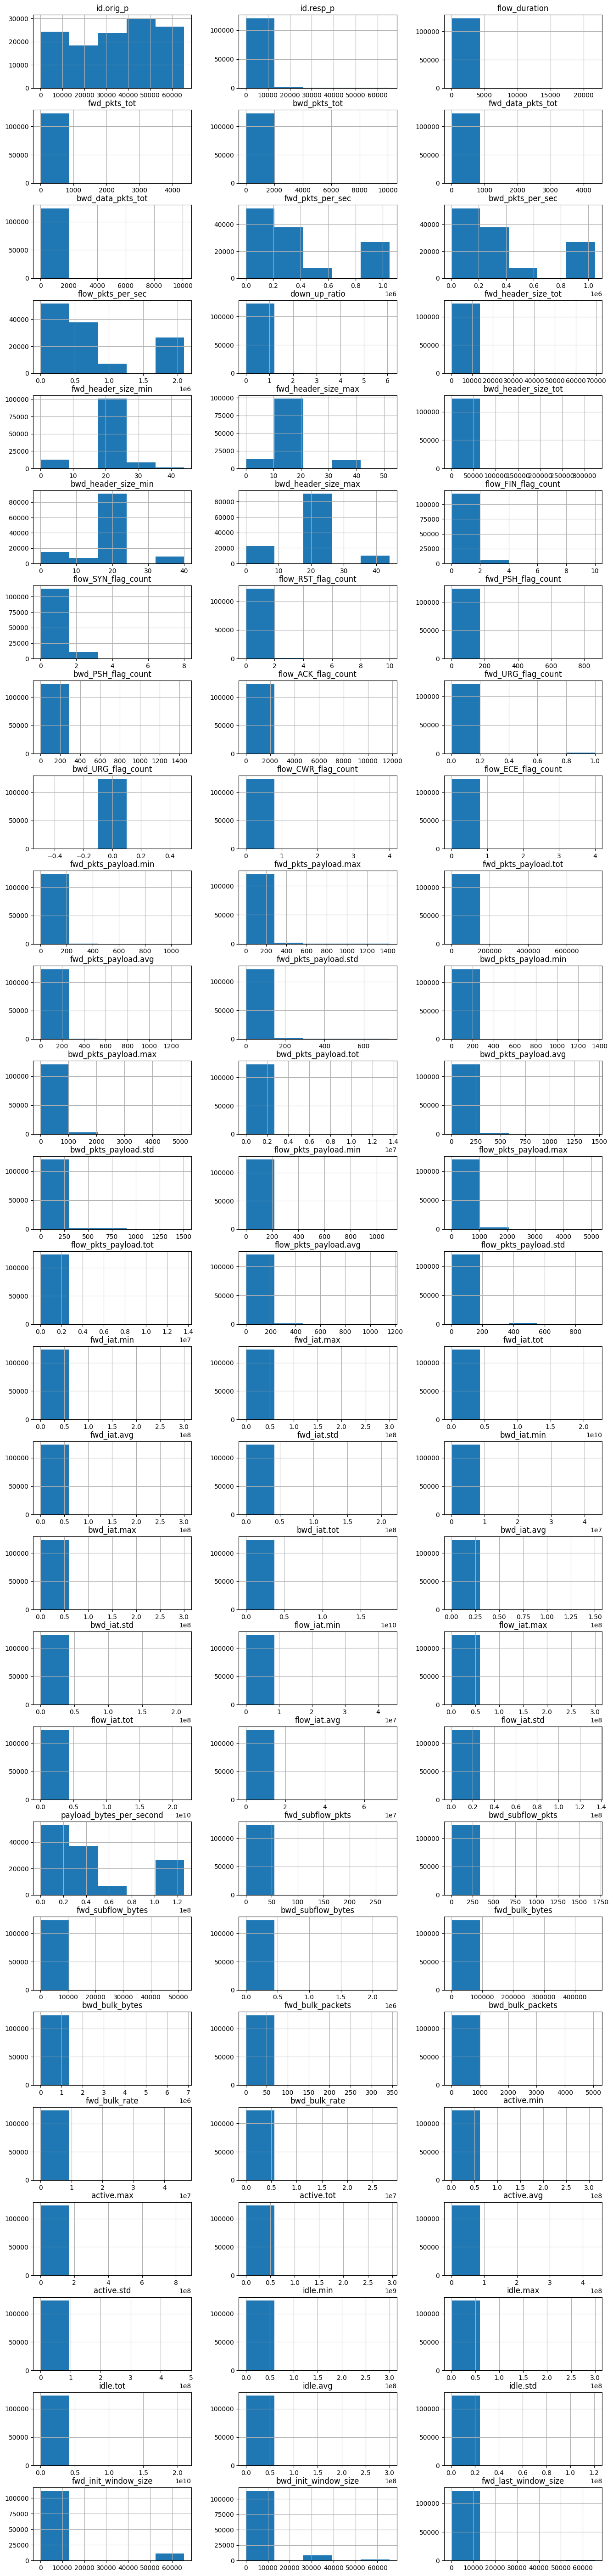

In [27]:
#Histograms
import math

pandas_df[num_features].hist(bins=5, layout=(math.ceil(len(num_features)/3), 3), figsize=(16,72))

<ipython-input-28-4a27530799f5>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = X.skew()


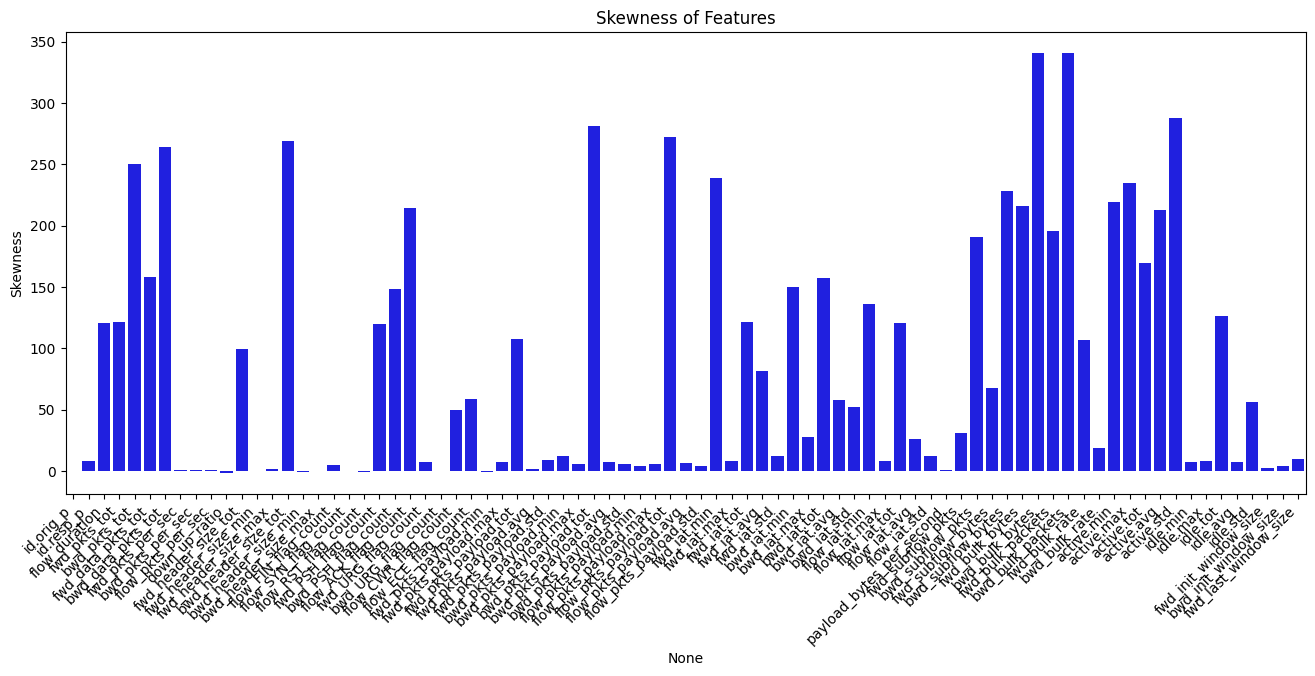

In [28]:
# Calculate skewness for each numerical column
skewness = X.skew()

# Create a bar plot or a histogram of skewness values
plt.figure(figsize=(16, 6))
sns.barplot(x=skewness.index, y=skewness.values, color='blue')
plt.xticks(rotation=45, ha='right')
plt.title('Skewness of Features')
plt.ylabel('Skewness')
plt.show()

In [29]:
# Scatter Matrix Plot of Numeric Features
from pandas.plotting import scatter_matrix
#scatter_matrix(pandas_df[num_features], figsize=(16, 16))

#Note: a scatter matrix was initially made but it is time consuming and does not show alot

Text(0.5, 1.0, 'Correlation Heatmap')

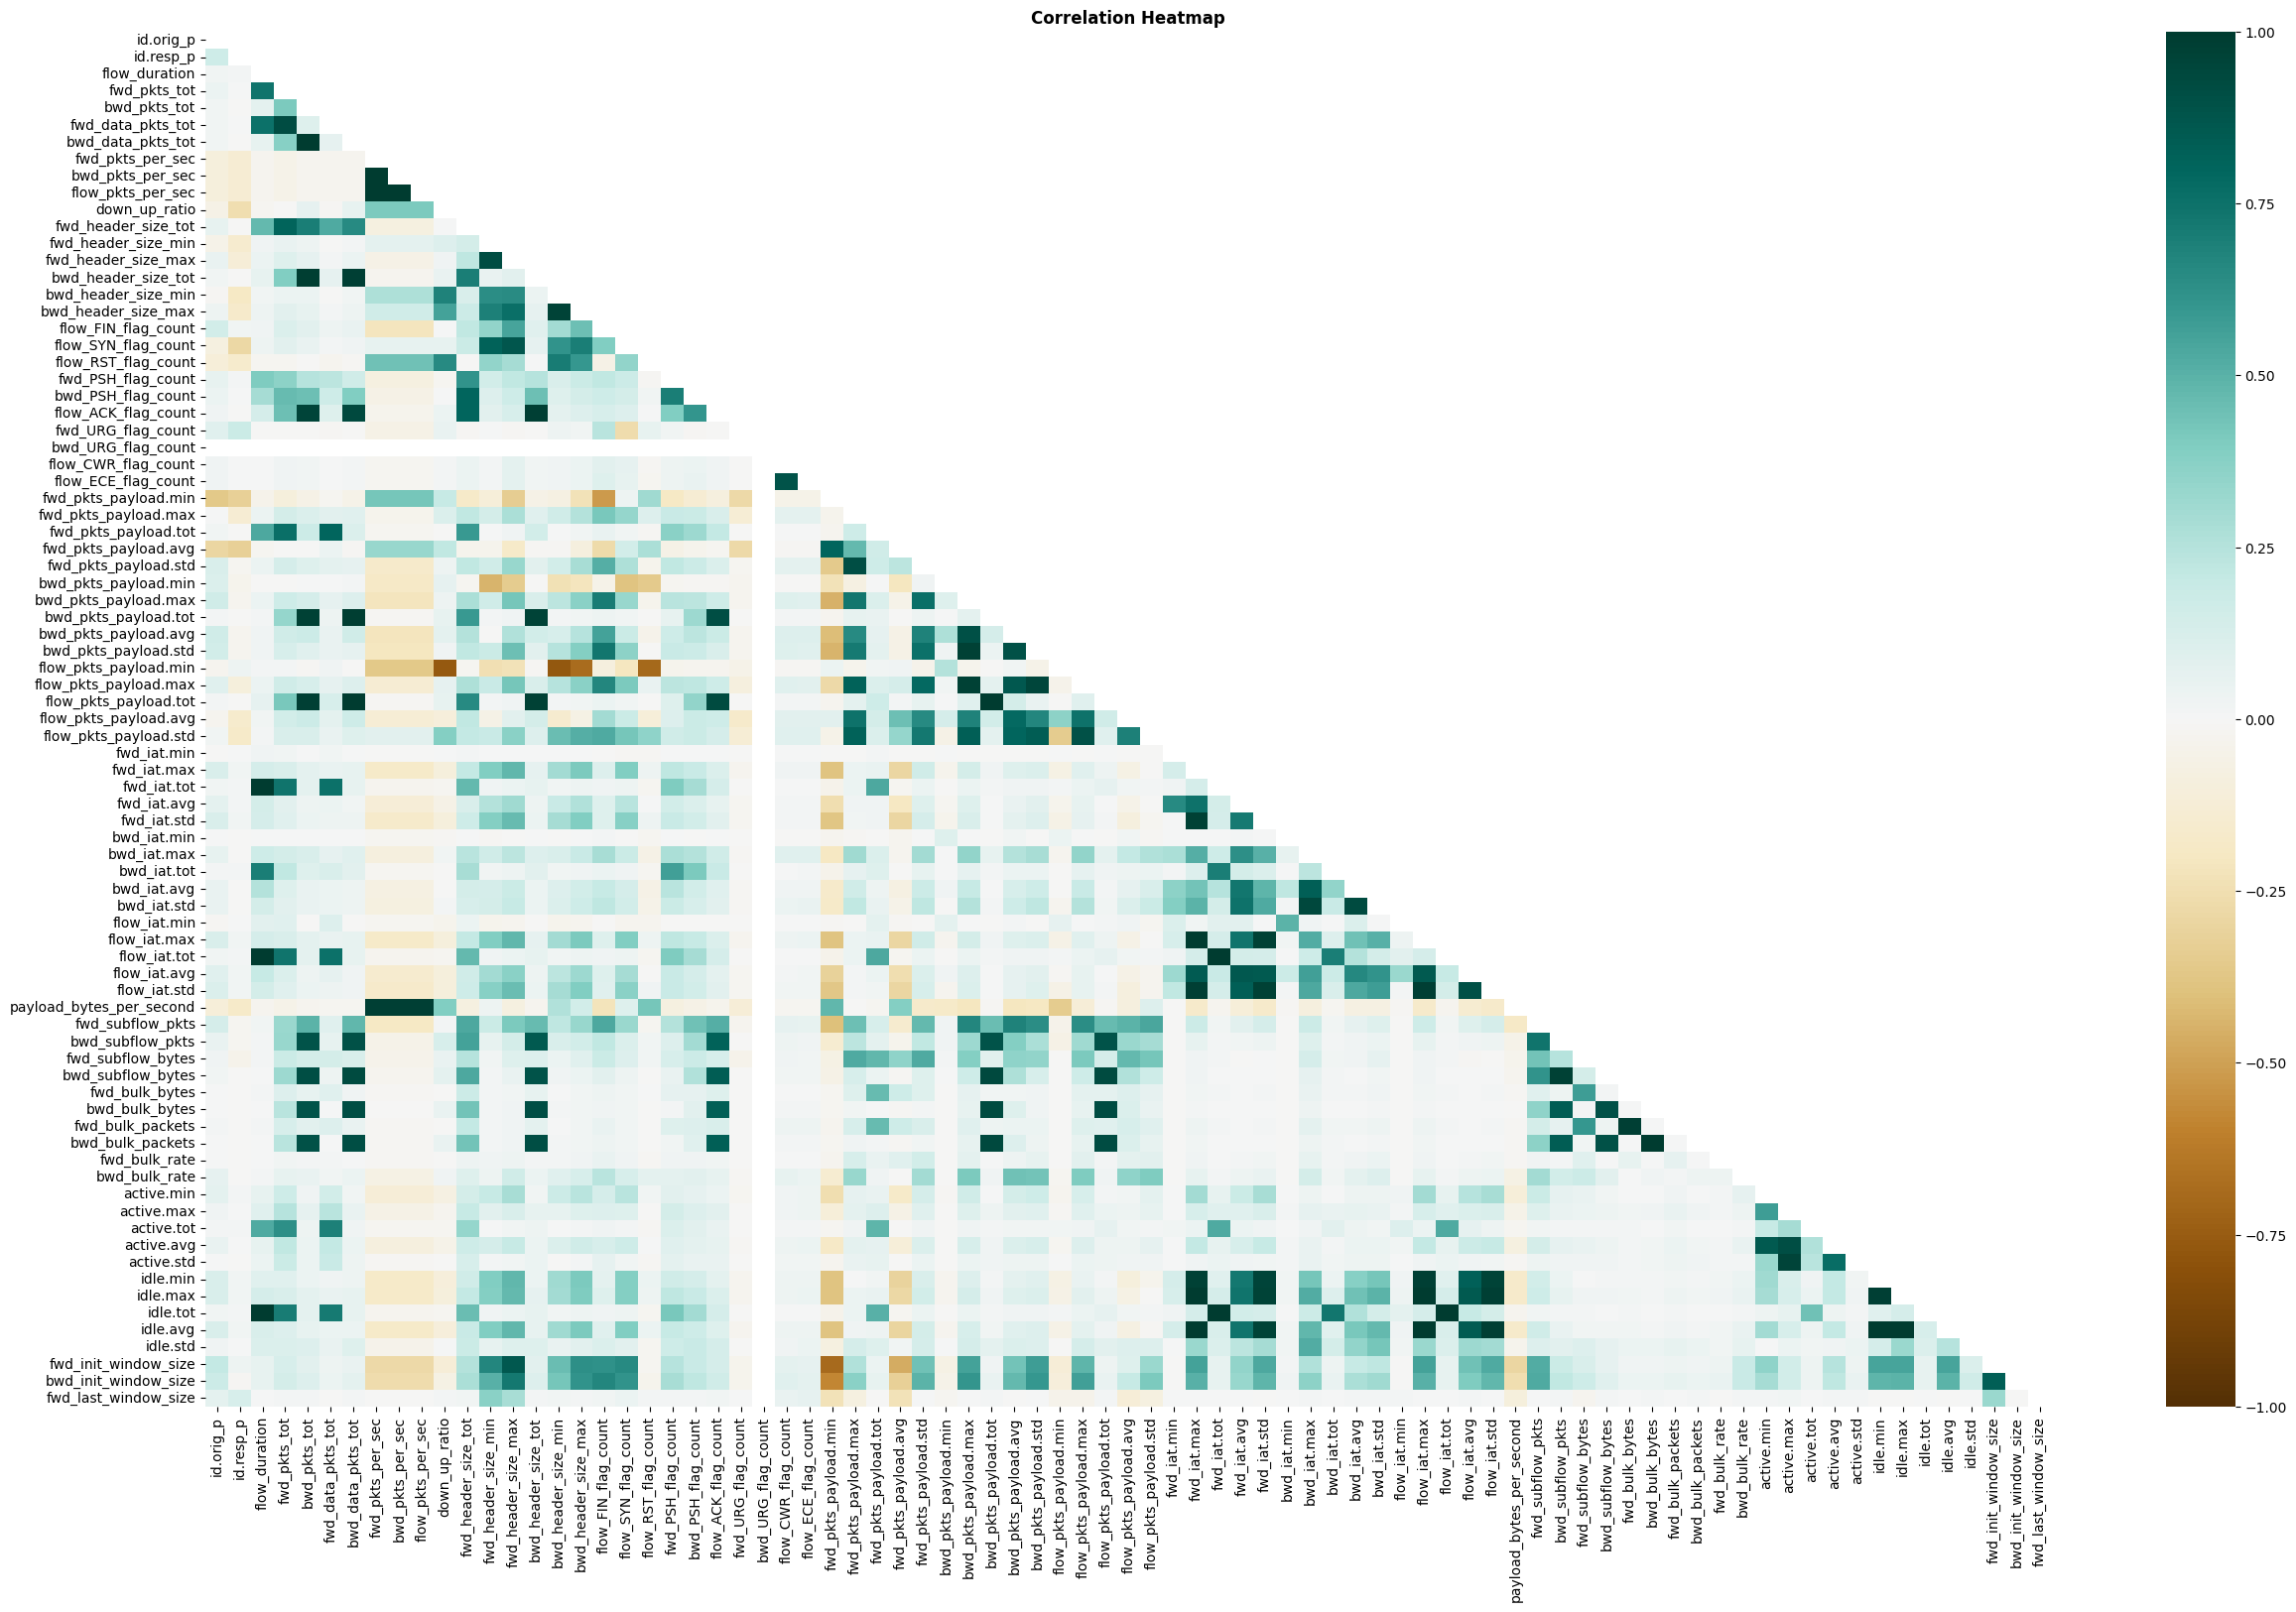

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Correlation Matrix
correlation_df = pandas_df.corr(numeric_only = True)
plt.figure(figsize=(30, 18))
mask = np.triu(np.ones_like(correlation_df, dtype=bool))
heatmap = sns.heatmap(correlation_df, mask=mask, vmin=-1, vmax=1, cmap='BrBG')
plt.title('Correlation Heatmap', weight='bold')

# Section 2: Clean the data

10 points

Not every dataset is going to be ready to use right away. Take steps to fix incorrect inputs, remove null values, and assign datatypes that fit each feature.

### This section should include one or more of the following:
- A count of rows before and after dropping data with null or incorrect values, including an explaination of why removing the rows was necessary in [markdown](https://www.markdownguide.org/cheat-sheet).
- Renaming a column, adding a new one, or casting an existing one as a different datatype.
- Remove punctuation marks, symbols, etc from the data, and convert all upper-case lettering to lower-case.
- Remove or fix rows that have bad values/data.

## Check for null values. As we can see from the output, there are no null values for this dataset. This is expected, as this data comes from a Research Paper Experiment.

In [31]:
from pyspark.sql.types import *
from pyspark.sql import functions as F

# Look at null count by columns - Secondary Check after conversion to PySpark Dataframe.
spark_df_escaped_columns = ["`" + column + "`" for column in spark_df.columns]
spark_df.select([F.count(F.when(F.col(column).isNull(), column)).alias(column) for column in spark_df_escaped_columns]).show()

+-----------+-----------+-------+---------+---------------+--------------+--------------+-------------------+-------------------+------------------+------------------+-------------------+---------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+--------------------+--------------------+---------------------+--------------------+--------------------+---------------------+---------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-

## In Pyspark, periods in column names can be problematic so we are renaming them

In [32]:
#Let's rename our columns and replace periods (.) with underscores (_).
old_columns = spark_df.schema.names
new_columns = [col_name.replace(".", "_") for col_name in spark_df.schema.names]
spark_df_with_columns_renamed = spark_df.withColumnsRenamed(dict(zip(old_columns, new_columns)))

#create updated features list
cat_features_renamed = [feature.replace(".", "_") for feature in cat_features]
num_features_renamed = [feature.replace(".", "_") for feature in num_features]
int_num_feature_renamed = [feature.replace(".", "_") for feature in int_num_features]
cont_num_features_renamed = [feature.replace(".", "_") for feature in cont_num_features]

## For clarity, modify Service feature to replace '-' with 'idle'

In [33]:
# in service column, replace "-" with "idle"
spark_df_with_columns_renamed_service_modified = spark_df_with_columns_renamed.withColumn('service_modified', F.regexp_replace('service', '-', 'idle'))

# update in feautre list
cat_features_renamed.remove('service')
cat_features_renamed.append('service_modified')

In [34]:
# Declare final dataframe from section 2
spark_df_cleaned = spark_df_with_columns_renamed_service_modified

# Section 3: Transform the clean data

10 points

Once you have clean data, start to prepare it to fit your analysis tools. This might mean using custom code to normalize certain values, joining supplemental datasets, and/or preparing it for machine learning.

### This section should include one or more of the following:
- Write a UDF to perform a function, then use it to add a new column to your data. Explain why in [markdown](https://www.markdownguide.org/cheat-sheet)
- Join an outside data source. (It can be one you've prepared alongside the primary source you're using, as long as you link it)
- Split the data into train/test sets
- Create vectors for relavent features
- One-hot encode catagorical variables

## Define custom transformer for preprocessing pipeline. To Binary Encode our Multi Class Label

In [35]:
# Define custom transformer for preprocessing
from pyspark.sql import DataFrame
from pyspark.ml import Transformer
from pyspark.ml.param.shared import HasInputCol, HasOutputCol
from pyspark.sql.types import *
from pyspark.sql import functions as F

class WithBinaryLabelColumn(Transformer, HasInputCol, HasOutputCol):

    def __init__(self, groundStateLabels: list[str], inputCol: str, outputCol: str):
        super(WithBinaryLabelColumn, self).__init__()
        self.groundStateLabels = groundStateLabels
        self.inputCol = inputCol
        self.outputCol = outputCol

    def _transform(self, spark_df: DataFrame) -> DataFrame:
        transformed_df = spark_df.withColumn(self.outputCol,
                                             F.when(
                                                 F.col(self.inputCol).isin(self.groundStateLabels), F.lit(0)
                                                 ).otherwise(F.lit(1)))
        return transformed_df

## Execute Preprocessing Pipeline: String Indexing, One Hot Encoding, Binary Encoding for Label, Vector Assembly

In [36]:
# Import Pre Processing Objects
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler

# StringIndexer is used to convert categorical variables into numerical indices
stages = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(spark_df_cleaned) for column in cat_features_renamed]

# OneHotEncoder converts the indexed categorical variables into one-hot encoded vectors
stages.append(OneHotEncoder(inputCols=[feature + "_index" for feature in cat_features_renamed], outputCols=[feature + "_num" for feature in cat_features_renamed]))

# String Index Label / Predicted Variable
stages.append(StringIndexer(inputCol="Attack_type", outputCol="Attack_type_index"))
stages.append(StringIndexer(inputCol="Attack_type", outputCol="label"))

# Append Custom Binary Label Column Tansformer
normal_network_activity = ['Thing_Speak', 'MQTT_Publish', 'Wipro_bulb']
stages.append(WithBinaryLabelColumn(groundStateLabels=normal_network_activity, inputCol="Attack_type", outputCol="Network_attack"))

# Collate a list of all final prepared features
final_features_list = num_features_renamed + [feature + "_num" for feature in cat_features_renamed]

# VectorAssembler combines the selected columns into a single vector in one column
stages.append(VectorAssembler(inputCols=final_features_list, outputCol='features'))


pipeline = Pipeline(stages=stages)
spark_df_transformed = pipeline.fit(spark_df_cleaned).transform(spark_df_cleaned)

spark_df_transformed.show(5)

+---------+---------+-----+-------+-----------------+------------+------------+-----------------+-----------------+----------------+----------------+-----------------+-------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+-------------------+------------------+------------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------+---------------------+---------------------+---------------------+---------------------+-----------+-------------+-------------+-----------+-------------+-----------+-----------+------------------+------------------+-----------------+------------+-------------+----------

In [37]:
# Randomly split data for model training and testing
# train on 80% of data, test with 20%
train, test = spark_df_transformed.randomSplit([0.8, 0.2], seed = 42)
print(train.count(), test.count())

98741 24376


# Section 4: Show your analysis of the data

10 points

This is where the science happens. Use your data to show some kind of insight, and how you got there. Make the reader understand why it's important, and how they can get the same conslusion, and/or what would need to change to reach a different one.

### This section should include one or more of the following:
- Fit the data to a model
- Show the outcome of clustering, regression, and/or classification algorithms.
 - We used several in class, but you can use whatever fits your needs for this assignment
- Reccomend a product/item
- Use a SQL query to filter results


In [38]:
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, GBTClassifier
from pyspark.ml.feature import BucketedRandomProjectionLSH, BucketedRandomProjectionLSHModel
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder, CrossValidatorModel
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

## Section 4a: Logistic Regression

In [39]:
# Logistic Regression: Fit to training data
log_reg = LogisticRegression(featuresCol = 'features', labelCol='Attack_type_index', standardization= True,
                             maxIter= 100, tol= 0.000005, elasticNetParam= 1)
log_reg_cv = CrossValidator(estimator=log_reg, estimatorParamMaps=ParamGridBuilder().build(), evaluator=MulticlassClassificationEvaluator(labelCol='Attack_type_index'), numFolds=3)
log_model = log_reg_cv.fit(train)

# Logistic Regression: Testing
results = log_model.transform(test)
results.show()

+---------+---------+-----+-------+-------------+------------+------------+-----------------+-----------------+------------------+----------------+------------------+-------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+-------------------+------------------+------------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------+---------------------+---------------------+---------------------+---------------------+-----------+-------------+-------------+-------------+-------------+------------------+-----------------+------------+-------------+-------------+------------------+-----------------+-

In [40]:
# Logistic Regression: Count up correct predictions
correct_predictions = 0
incorrect_predictions = 0

for row in results.collect():
  if row['Attack_type_index'] == row['prediction']:
    correct_predictions+=1
  else:
    incorrect_predictions+=1

print(f'Correct Predictions: {correct_predictions}')
print(f'Incorrect Predictions: {incorrect_predictions}')

Correct Predictions: 24169
Incorrect Predictions: 207


In [41]:
# Logistic Regression: Make sure that our model predicts all / most classes
results.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|       8.0|   68|
|       0.0|18786|
|       7.0|  201|
|       1.0| 1592|
|       4.0|  544|
|       3.0|  806|
|       2.0| 1543|
|       9.0|   50|
|      11.0|    3|
|      10.0|    9|
|       6.0|  389|
|       5.0|  385|
+----------+-----+



In [42]:
# Using pyspark's multiclass classifer model metrics
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Calling the evaluator
metric_evaluator = MulticlassClassificationEvaluator(labelCol='Attack_type_index')
(metric_evaluator.getMetricName(), metric_evaluator.evaluate(results))

('f1', 0.9914276074288222)

### The logistic regression model (as well as the subsequent Ensemble Method models) gave suspiciously good results. I inspected the data tranformation pipeline for data leakage but did not find anything wrong. I also went back and added in cross validation. Another potential reason why the model performs so well may be due to the controlled experimental environment in which the data originated from. This controlled environment may not be a good representation of real world networks, which are used for alot more variety of applications and services.

## Section 4b: Random Forest

In [43]:
# Random Forest Classifer: Fit to training data
random_forest = RandomForestClassifier(featuresCol = 'features', labelCol='Attack_type_index', numTrees=100)
random_forest_cv = CrossValidator(estimator=random_forest, estimatorParamMaps=ParamGridBuilder().build(), evaluator=MulticlassClassificationEvaluator(labelCol='Attack_type_index'), numFolds=3)
random_forest_model = random_forest_cv.fit(train)

#Random Forest Classifer: Testing
results = random_forest_model.transform(test)
results.show()

+---------+---------+-----+-------+-------------+------------+------------+-----------------+-----------------+------------------+----------------+------------------+-------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+-------------------+------------------+------------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------+---------------------+---------------------+---------------------+---------------------+-----------+-------------+-------------+-------------+-------------+------------------+-----------------+------------+-------------+-------------+------------------+-----------------+-

In [44]:
# Random Forest Classifer: Count up correct predictions
correct_predictions = 0
incorrect_predictions = 0

for row in results.collect():
  if row['Attack_type_index'] == row['prediction']:
    correct_predictions+=1
  else:
    incorrect_predictions+=1

print(f'Correct Predictions: {correct_predictions}')
print(f'Incorrect Predictions: {incorrect_predictions}')

Correct Predictions: 24177
Incorrect Predictions: 199


In [45]:
# Random Forest Classifer: Make sure that our model predicts all / most classes
results.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|       1.0| 1568|
|       4.0|  509|
|       3.0|  802|
|       2.0| 1615|
|       6.0|  390|
|       9.0|   10|
|       8.0|  112|
|       0.0|18785|
|       7.0|  200|
|       5.0|  385|
+----------+-----+



In [46]:
# Calling the evaluator on test
metric_evaluator = MulticlassClassificationEvaluator(labelCol='Attack_type_index')
(metric_evaluator.getMetricName(), metric_evaluator.evaluate(results))

('f1', 0.9909885573618508)

## Section 4c: Gradient Boosting (Pyspark model implementation only supports Binary Classification for this Ensemble Method)

In [47]:
# Gradient Boosting Classifer: Fit to training data
gbt = GBTClassifier(featuresCol = 'features', labelCol='Network_attack', maxIter=10)
gbt_cv = CrossValidator(estimator=gbt, estimatorParamMaps=ParamGridBuilder().build(), evaluator=BinaryClassificationEvaluator(labelCol='Network_attack'), numFolds=3)
gbt_model = gbt_cv.fit(train)

# Gradient Boosting Classifer: Testing
results = gbt_model.transform(test)
results.show()

+---------+---------+-----+-------+-------------+------------+------------+-----------------+-----------------+------------------+----------------+------------------+-------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+-------------------+------------------+------------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------+---------------------+---------------------+---------------------+---------------------+-----------+-------------+-------------+-------------+-------------+------------------+-----------------+------------+-------------+-------------+------------------+-----------------+-

In [48]:
# Gradient Boosting Classifer: Count up correct predictions
correct_predictions = 0
incorrect_predictions = 0

for row in results.collect():
  if row['Network_attack'] == row['prediction']:
    correct_predictions+=1
  else:
    incorrect_predictions+=1

print(f'Correct Predictions: {correct_predictions}')
print(f'Incorrect Predictions: {incorrect_predictions}')

Correct Predictions: 24308
Incorrect Predictions: 68


In [49]:
# Gradient Boosting Classifer: Make sure that our model predicts both classes
results.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|       0.0| 2444|
|       1.0|21932|
+----------+-----+



In [50]:
# Calling the evaluator
metric_evaluator = BinaryClassificationEvaluator(labelCol='Network_attack')
(metric_evaluator.getMetricName(), metric_evaluator.evaluate(results))

('areaUnderROC', 0.9992627599356301)

## Section 4d: LSH k Nearest Neighbor

In [51]:
# LSH Clustering: Fit and transform
lsh = BucketedRandomProjectionLSH(inputCol="features", outputCol="hashes", seed=42, numHashTables=64, bucketLength=5250.0)
lsh_model = lsh.fit(train)
train_transformed = lsh_model.transform(train)
test_transformed = lsh_model.transform(test)
train_transformed.show()

+---------+---------+-----+-------+------------------+------------+------------+-----------------+-----------------+----------------+----------------+------------------+-------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+-------------------+------------------+------------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------+---------------------+---------------------+---------------------+---------------------+-----------+-------------+------------+-------------+-----------+-----------+-----------+-----------+-----------+-----------+------------+-------------+------------+-------------+--

### I attempted to parallelize the approxNearestNeighbors() calculations for the entire test dataset. However, in Pyspark, this LSH model calculations cannot be sent to worker nodes and can only be performed on the driver / master. I also attempted use a different python package to parallelize (concurrent.futures), but even that still was too time consuming. In the end, I decided to sequential calculations on a few selected points. This is a key draw back to the Nearest Neighbor model, as all the heavy computation is left to the test stage

In [52]:
test_transformed_collected = test_transformed.collect()
test_vectorized_features_list = [row[-2] for row in test_transformed_collected]
test_label_list = [row[-4] for row in test_transformed_collected]
train_mode = train_transformed.groupby('Attack_type_index').count().orderBy('count', ascending=False).first()[0]

def my_lsh_model_clustering_prediction(my_test_vectorized_features, my_lsh_model= lsh_model, my_train_transformed= train_transformed, my_default_value= train_mode):
  test_prediction = -999
  approx_nearest_neighbors_df = my_lsh_model.approxNearestNeighbors(my_train_transformed, my_test_vectorized_features, 5)
  if approx_nearest_neighbors_df.take(1) == []:
    test_prediction = my_default_value
  else:
    nearest_neighbors_mode = approx_nearest_neighbors_df.groupby('Attack_type_index').count().orderBy('count', ascending=False).first()[0]
    test_prediction = nearest_neighbors_mode
  del approx_nearest_neighbors_df
  return test_prediction

In [53]:
actual = []
pred = []

for test_point in [0, 1, 2, 8, 13, 14, 19, 20, 23, 30, 67, 134, 289, 301, 457, 808, 1132, 1743, 4476, 6789, 7212, 9050]:
  pred.append(my_lsh_model_clustering_prediction(test_vectorized_features_list[test_point]))
  actual.append(test_label_list[test_point])

print(actual)
print(pred)

[9.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[3.0, 5.0, 1.0, 1.0, 1.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]


In [54]:
# LSH Clustering: Count up correct predictions
correct_predictions = 0
incorrect_predictions = 0

for i, act in enumerate(actual):
  if act == pred[i]:
    correct_predictions+=1
  else:
    incorrect_predictions+=1

print(f'Correct Predictions: {correct_predictions}')
print(f'Incorrect Predictions: {incorrect_predictions}')

Correct Predictions: 15
Incorrect Predictions: 7
